In [3]:
## Import required Python modules
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#from IPython.core.display import display
from IPython.display import HTML

## Customising the font size of figures
plt.rcParams.update({'font.size': 14})

In [4]:
## Custom imports
from scipy.stats import poisson, norm
from math import ceil
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from matplotlib.cm import jet
import pandas as pd
from tqdm import trange
from typing import Tuple
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

<div class="container-fluid">
    <div class="row">
        <div class="col-md-8" align="center">
            <h1>PHYS 10792: Introduction to Data Science</h1>
            <!--<h3>2019-2020 Academic Year</h3><br>-->
        </div>
        <div class="col-md-3">
            <img align='center' style="border-width:0" src="images/UoM_logo.png"/>
        </div>
    </div>
</div>

<div class="container-fluid">
    <div class="row">
        <div class="col-md-2" align="right">
            <b>Course instructors:&nbsp;&nbsp;</b>
        </div>
        <div class="col-md-9" align="left">
            <a href="http://www.ajmarkwick.net/">Dr. Andrew Markwick</a> - Twitter <a href="https://twitter.com/AndrewMarkwick">@AndrewMarkwick</a><br>
            <a href="www.oms-lab.org">Dr. Patrick Parkinson</a>
        </div>
    </div>
</div>

# Chapter 10

## Syllabus

1. Probabilities and interpretations
2. Probability distributions
3. Parameter estimation
4. Maximum likelihood
5. Least square, chi2, correlations
6. Monte Carlo basics
7. Goodness of fit tests
8. Hypothesis testing
9. Probability and confidence level
10. **Limit setting**
11. Introduction to multivariate analysis techniques

## Topics

**[10 Limit setting](#10-Limit-setting)**

**[10.1 Coverage](#10.1-Coverage)**
- 10.1.1 Definition of coverage
- 10.1.2 Measurement of a constrained quantity

**[10.2 The issue of flip-flopping](#10.2-The-issue-of-flip-flopping)**
- 10.2.1 Combining different approaches
- 10.2.2 Flip-flopping
- 10.2.3 Poisson belts

**[10.3 The Feldman-Cousins method](#10.3-The-Feldman-Cousins-method)**
- 10.3.1 Description of the method and application to Poisson intervals
- 10.3.2 Application to Gaussian confidence belts

## 10 Limit setting

Confidence Levels were introduced in Chapters 8 and 9. These were mostly discussed in scenarios not affected by limitations of the parameters that are being assessed. In this part we cover the somewhat more complicated situation when physical boundaries apply, e.g. that a quantity has to be positive (e.g. a mass).

This Chapter largely follows a paper by Feldman and Cousins: <a href="https://journals.aps.org/prd/abstract/10.1103/PhysRevD.57.3873">Phys. Rev. D57 (1998) 3873</a>. This is an excellent paper well worth a read.

Below is a hypothetical confidence belt based on Gaussian probability density functions with varying mean and width. In this example the parameters are

mean $ = 2 + 3 \times \sqrt{\mu}$,

and

standard deviation $ = 0.5 + 0.05 \times \mu$.

As we are now dealing with a continuous variable, the confidence level covered by each horizontal band is exactly 90%.

A problem arises if we want to assign a confidence interval for $\mu$ for a measured value around $x=1$.

<>:78: SyntaxWarning: invalid escape sequence '\m'
<>:78: SyntaxWarning: invalid escape sequence '\m'
/var/folders/sq/1nnyt8dx16xcb3rm20k11c9m0000gp/T/ipykernel_80859/1759331771.py:78: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Mean ($\mu$)')


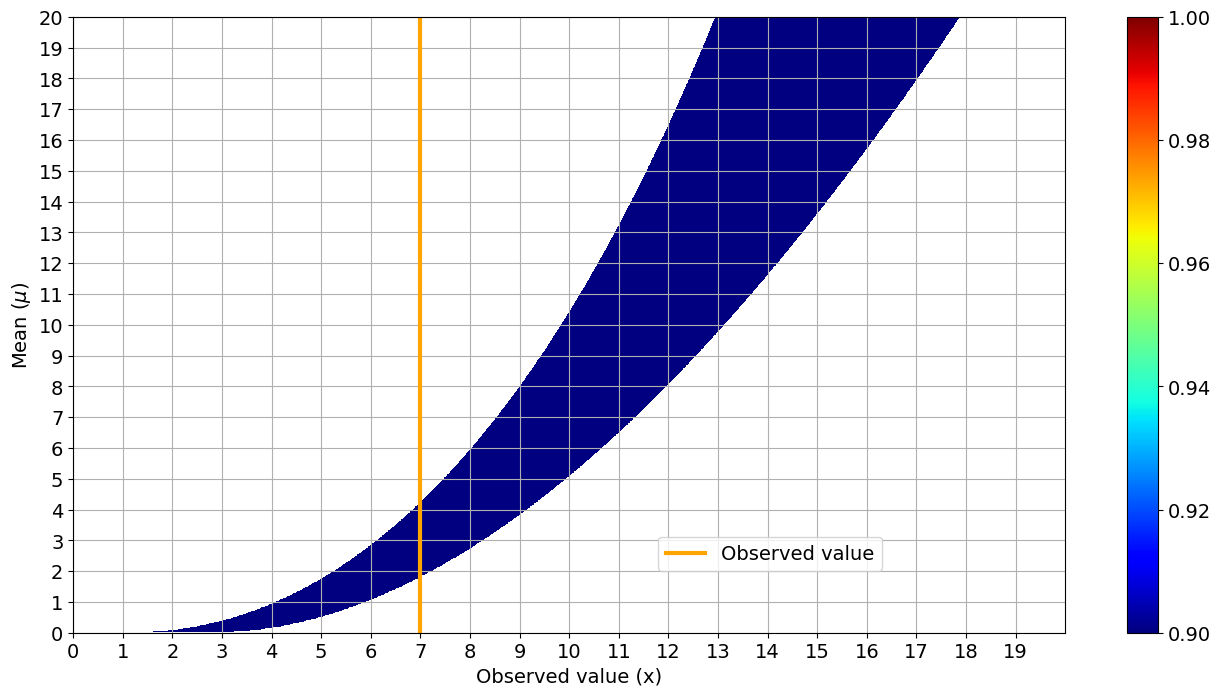

In [5]:
def calculate_confidence_interval(
    confidence_level: float, 
    mean: float, 
    std_dev: float
) -> Tuple[float, float, float]:
    """
    Calculate the central confidence interval for a normal distribution.
    
    Args:
        confidence_level: Desired confidence level (e.g., 0.9 for 90%)
        mean: Mean of the normal distribution
        std_dev: Standard deviation of the normal distribution
    
    Returns:
        lower_bound: Lower boundary of confidence interval
        upper_bound: Upper boundary of confidence interval
        coverage: Actual coverage probability
    """
    # Calculate boundaries for central interval
    lower_bound = norm.ppf(0.5 * (1 - confidence_level), mean, std_dev)
    upper_bound = norm.ppf(0.5 * (1 - confidence_level) + confidence_level, mean, std_dev)
    
    # Calculate actual coverage probability
    coverage = norm.cdf(upper_bound, mean, std_dev) - norm.cdf(lower_bound, mean, std_dev)
    
    return lower_bound, upper_bound, coverage

# Set main parameters
CONFIDENCE_LEVEL = 0.9  # 90% confidence level
N_SAMPLES = 1000       # Number of points to sample
MAX_MEAN = 20.0       # Maximum mean value to consider
MAX_X = 20            # Maximum x-axis value

# Initialize lists for confidence belt visualization
confidence_intervals = []
coverage_values = []

# Calculate confidence intervals for different mean values
for i in range(1, N_SAMPLES):
    # Calculate mean value for this sample
    current_mean = MAX_MEAN * i / N_SAMPLES
    
    # Define mean and std dev using model functions
    model_mean = 2.0 + 3.0 * np.sqrt(current_mean)
    model_std = 0.5 + current_mean / MAX_MEAN
    
    # Calculate confidence interval
    lower, upper, coverage = calculate_confidence_interval(
        CONFIDENCE_LEVEL, model_mean, model_std
    )
    
    # Create rectangle for visualization
    interval_width = upper - lower
    interval_height = MAX_MEAN / N_SAMPLES
    confidence_intervals.append(Rectangle((lower, current_mean), 
                                       interval_width, interval_height))
    coverage_values.append(coverage)

# Create visualization
fig, ax = plt.subplots(figsize=(16, 8))

# Create confidence belt collection
confidence_belt = PatchCollection(confidence_intervals, alpha=1.0, cmap='jet')
confidence_belt.set_array(np.array(coverage_values))
confidence_belt.set_clim([0.9, 1])

# Set up plot
ax.add_collection(confidence_belt)
ax.set_xlim(0, MAX_X)
ax.set_ylim(0, MAX_MEAN)

# Add grid and labels
ax.set_yticks([MAX_MEAN * x/20 for x in range(21)])
ax.set_xticks(range(MAX_X))
ax.grid(which='both', axis='x')
ax.grid(which='major', axis='y')
ax.set_xlabel('Observed value (x)')
ax.set_ylabel('Mean ($\mu$)')

# Add observed value line
ax.plot([7.0]*2, [0, MAX_MEAN], label='Observed value', 
        color='orange', linewidth=3)
ax.legend(loc=[0.59, 0.10])

# Add colorbar and display
plt.colorbar(confidence_belt)
plt.show()

### 10.1 Coverage

#### 10.1.1 Definition of coverage

The construction of confidence belts, which we discussed previously, is based on defining horizontal intervals according to a certain confidence level $C$. These can be constructed as central confidence intervals according to

$$P(x<x_1|\mu)=P(x>x_2|\mu)=(1-C)/2,$$

or as upper confidence limit intervals

$$P(x<x_1|\mu)=1-C.$$

For a given measured value of $x_0$, these then lead to an interval for $\mu$ with

$$P(\mu\in[\mu_1,\mu_2])=C.$$

This statement means that the unknown true value of $\mu$, $\mu_t$ lies within the interval $[\mu_1,\mu_2]$ in a fraction $C$ of the experiments conducted.

This equation being satisfied indicates that the intervals _cover_ $\mu$ at the stated confidence, or that they have the correct _coverage_.

Alternatively, the case when

$$P(\mu\in[\mu_1,\mu_2])<C,$$

is called _undercoverage_. This is a serious issue as this implies the existence of more information than is the case in reality.

Conversely,

$$P(\mu\in[\mu_1,\mu_2])>C,$$

is called _overcoverage_ , which is in most cases a less severe issue, but it leads to a loss of rejection power against false hypotheses. This case is sometimes called conservatism. Being conservative is never optimal and one should always strive to make estimates as accurate as possible.

#### Recap: Confidence levels from Gaussians

In the case of Gaussian distribution functions, the construction becomes very simple. The $x_-$ and $x_+$ curves become straight lines and the limits are obtained simply by $\mu_\pm=x_0\pm n\sigma$, where $n=1$ for 68% confidence level, $n=1.64$ for 90% confidence level, and so on.

This is a simplified case of the introductory example above.

<>:84: SyntaxWarning: invalid escape sequence '\m'
<>:84: SyntaxWarning: invalid escape sequence '\m'
/var/folders/sq/1nnyt8dx16xcb3rm20k11c9m0000gp/T/ipykernel_80859/2204065105.py:84: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Mean ($\mu$)')


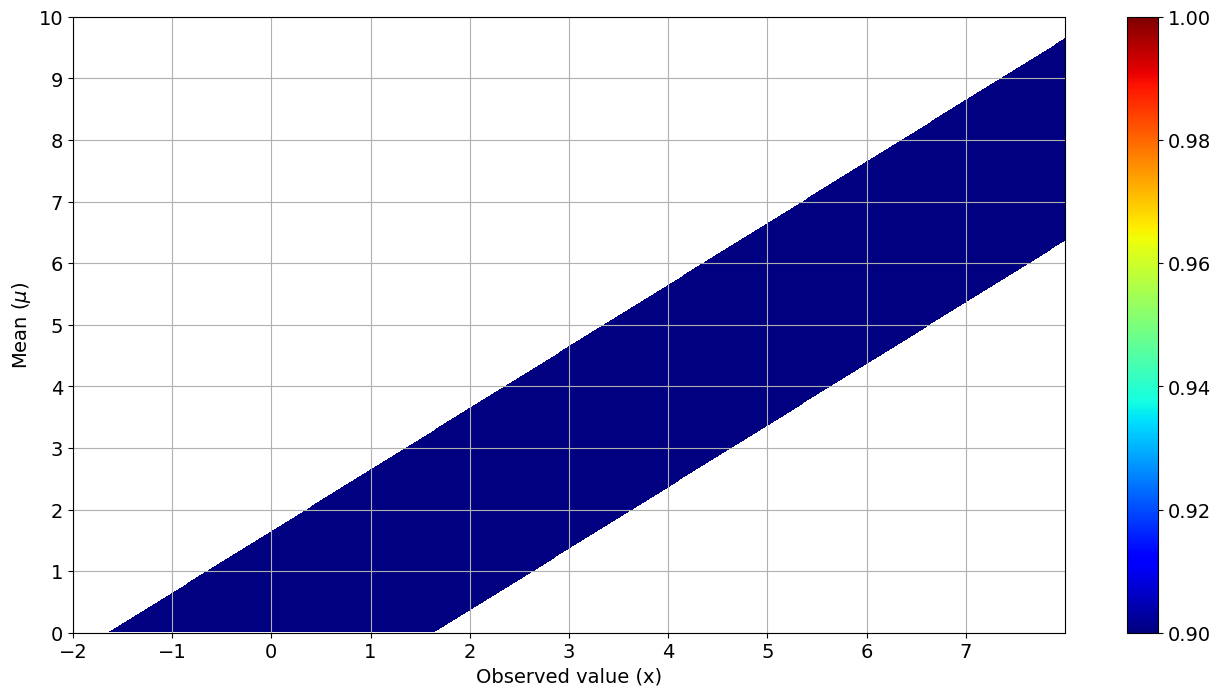

In [14]:
from typing import Tuple
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from math import ceil
from matplotlib.cm import jet

def calculate_confidence_interval(
    confidence_level: float, 
    mean: float, 
    std_dev: float
) -> Tuple[float, float, float]:
    """
    Calculate the confidence interval for a Gaussian distribution.
    
    Args:
        confidence_level: Desired confidence level (e.g., 0.9 for 90%)
        mean: Mean of the Gaussian distribution
        std_dev: Standard deviation of the Gaussian distribution
    
    Returns:
        lower_bound: Lower bound of confidence interval
        upper_bound: Upper bound of confidence interval
        actual_coverage: Actual probability coverage
    """
    # Calculate bounds using inverse CDF (percent point function)
    lower_bound = norm.ppf(0.5*(1-confidence_level), mean, std_dev)
    upper_bound = norm.ppf(0.5*(1-confidence_level) + confidence_level, mean, std_dev)
    
    # Calculate actual probability coverage between bounds
    actual_coverage = norm.cdf(upper_bound, mean, std_dev) - norm.cdf(lower_bound, mean, std_dev)
    
    return lower_bound, upper_bound, actual_coverage

# Set visualization parameters
confidence_level = 0.9  # 90% confidence level
n_samples = 1000       # Number of samples for visualization
max_mean = 10.0        # Maximum mean value to display
plot_x_min = -2.0      # Minimum x-axis value
plot_x_max = 8.0       # Maximum x-axis value
std_dev = 1.0          # Standard deviation

# Initialize collections for visualization
confidence_intervals = []
coverage_probabilities = []

# Calculate confidence intervals for different mean values
for i in range(1, n_samples):
    # Calculate mean value for this iteration
    current_mean = max_mean * i / n_samples
    
    # Calculate confidence interval
    lower, upper, prob = calculate_confidence_interval(
        confidence_level, current_mean, std_dev
    )
    
    # Create rectangle for visualization (width = interval, height = step size)
    interval_width = upper - lower
    height = max_mean/n_samples
    confidence_intervals.append(Rectangle((lower, current_mean), interval_width, height))
    coverage_probabilities.append(prob)

# Create collection of confidence intervals for plotting
confidence_belt = PatchCollection(confidence_intervals, alpha=1.0, cmap=jet)
confidence_belt.set_array(np.array(coverage_probabilities))
confidence_belt.set_clim([0.9, 1])  # Set color scale for coverage probability

# Create and configure plot
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_xlim(plot_x_min, plot_x_max)
ax.set_ylim(0, max_mean)

# Add confidence belt to plot
ax.add_collection(confidence_belt)

# Configure axis ticks and labels
ax.set_yticks([max_mean*x/10. for x in range(11)])
ax.set_xticks([plot_x_min + x for x in range(ceil(plot_x_max-plot_x_min))])
ax.grid(which='both', axis='x')
ax.grid(which='major', axis='y')
ax.set_xlabel('Observed value (x)')
ax.set_ylabel('Mean ($\mu$)')

# Add colorbar to show coverage probability
plt.colorbar(confidence_belt)
plt.show()

#### 10.1.2 Measurement of a constrained quantity

Let us consider the measurement of a mass. 

Assuming this measurement occurs with Gaussian uncertainties, we have the probability distribution function

$$P(x|\mu)=\frac{1}{\sqrt{2\pi}\sigma}e^{-(x-\mu)^2/2\sigma^2}.$$

The construction with a confidence belt fails miserably when a negative mass is measured with a relatively small uncertainty, e.g. $ (-0.5\pm0.2) $ g. When trying to construct a 90\% confidence interval, we would get $ \mu_{ \pm } = (-0.5\pm0.2\times 1.64) $ g, i.e. even $\mu_+=-0.172~$ g remains negative.

A solution to this issue is a Bayesian construction with a normalisation that takes the physical limit into account. For example for positive masses, one gets

$$P(\mu|x)=\frac{e^{-(x-\mu)^2/2\sigma^2}}{\int_0^\infty e^{-(x-\mu')^2/2\sigma^2}d\mu'}(\mu>0).$$

This construction will then lead to one limit being zero, i.e. we set an upper limit. 

We will now discuss the limitations of this approach.

The Bayesian construction above leads to generally useful upper limits. Its main drawback is that its construction is not independent of the measured value; in fact, it is a vertical construction as the interval is calculated for each possible observed value. This does not a priori give control over the coverage of the horizontal intervals.

The colourscale in the plot below illustrates the horizontal coverage for the limit that is derived, i.e. if a measured value $x$ leads to a limit of $\mu$, the colour of the vertical band at $x$ corresponds to $\int_x^\infty {\rm Gauss}(x',\mu,\sigma)dx'$.

This shows that despite the vertical construction, the Bayesian formula ensures correct coverage or overcoverage, i.e. it avoids undercoverage.

<>:86: SyntaxWarning: invalid escape sequence '\m'
<>:86: SyntaxWarning: invalid escape sequence '\m'
/var/folders/sq/1nnyt8dx16xcb3rm20k11c9m0000gp/T/ipykernel_80859/895188267.py:86: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Mean ($\mu$)')


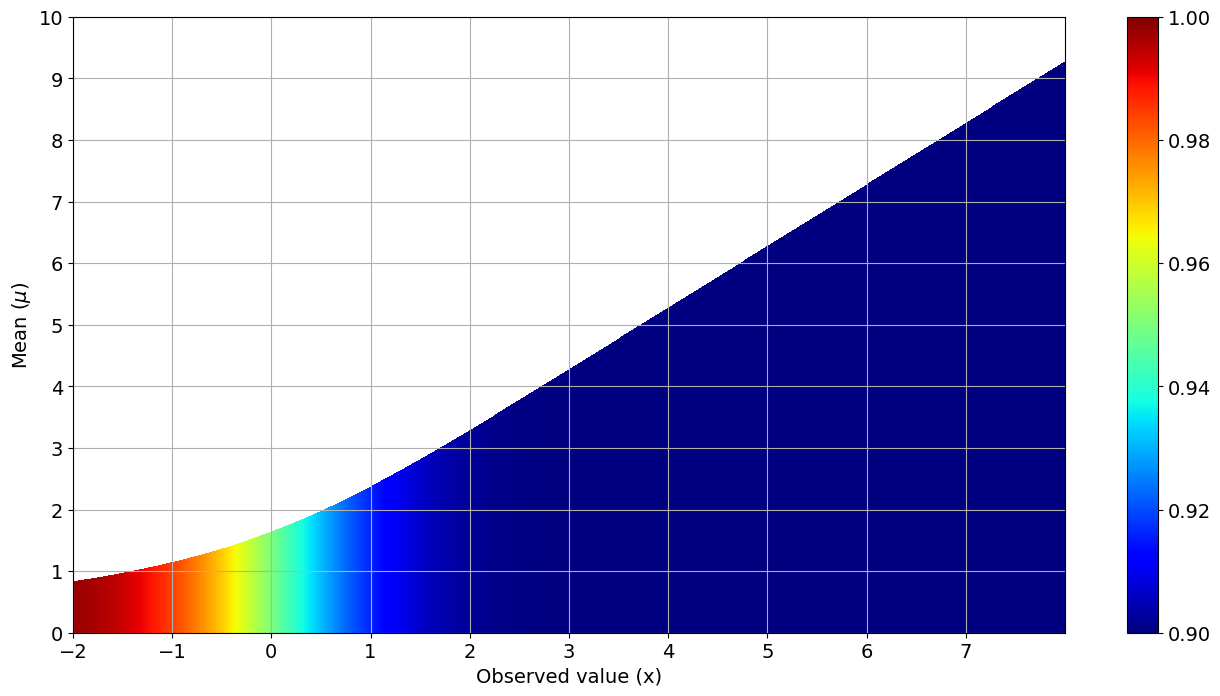

In [15]:
from typing import Tuple
import numpy as np
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from scipy.stats import norm
import matplotlib.pyplot as plt
from math import ceil

def calculate_bayesian_bounds(confidence_level: float, observed_value: float, 
                            measurement_uncertainty: float) -> Tuple[float, float]:
    """
    Calculate the Bayesian confidence bounds for a physically constrained parameter.
    
    Args:
        confidence_level: The desired confidence level (e.g., 0.9 for 90% CL)
        observed_value: The measured value
        measurement_uncertainty: The measurement uncertainty (sigma)
    
    Returns:
        upper_bound: The upper bound of the confidence interval
        probability: The actual coverage probability
    """
    # Calculate normalization factor (probability of physical measurement)
    normalization = norm.cdf(observed_value, loc=0, scale=measurement_uncertainty)
    
    # Calculate upper bound using inverse CDF (percent point function)
    upper_bound = norm.ppf((1-normalization) + confidence_level*normalization, 
                          loc=observed_value, scale=measurement_uncertainty)
    
    # Calculate actual coverage probability
    coverage_prob = 1.0 - norm.cdf(observed_value, loc=upper_bound, 
                                 scale=measurement_uncertainty)
    
    return upper_bound, coverage_prob

# Set statistical and plotting parameters
CONFIDENCE_LEVEL = 0.9
N_POINTS = 1000  # Number of points for smooth visualization
MEASUREMENT_SIGMA = 1.0

# Define plot ranges
MAX_MEAN = 10.0
X_MIN, X_MAX = -2.0, 8.0

# Initialize collections for confidence belt visualization
belt_patches = []
coverage_probabilities = []

# Calculate confidence belt points
for i in range(1, N_POINTS):
    # Calculate observed value for this point
    observed_x = X_MIN + (X_MAX - X_MIN) * i / N_POINTS
    
    # Lower bound is always 0 (physical constraint)
    lower_bound = 0
    
    # Calculate upper bound and coverage probability
    upper_bound, prob = calculate_bayesian_bounds(CONFIDENCE_LEVEL, observed_x, 
                                                MEASUREMENT_SIGMA)
    
    # Create rectangle for visualization
    width = (X_MAX - X_MIN) / N_POINTS
    height = upper_bound - lower_bound
    belt_patches.append(Rectangle((observed_x, 0), width, height))
    coverage_probabilities.append(prob)

# Create the confidence belt collection
confidence_belt = PatchCollection(belt_patches, alpha=1.0, cmap='jet')
confidence_belt.set_array(np.array(coverage_probabilities))
confidence_belt.set_clim([0.9, 1])

# Create and configure the plot
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_xlim(X_MIN, X_MAX)
ax.set_ylim(0, MAX_MEAN)

# Add the confidence belt to the plot
ax.add_collection(confidence_belt)

# Configure axes and grid
ax.set_yticks([MAX_MEAN * x/10 for x in range(11)])
ax.set_xticks([X_MIN + x for x in range(ceil(X_MAX-X_MIN))])
ax.grid(which='both', axis='x')
ax.grid(which='major', axis='y')
ax.set_xlabel('Observed value (x)')
ax.set_ylabel('Mean ($\mu$)')

plt.colorbar(confidence_belt)
plt.show()

##### Limitations of central confidence belts

Let us continue to consider the example of a Gaussian probability density function.

If we decide _a priori_ to construct central intervals, we get the confidence belt already shown above.

This belt achieves correct coverage for all allowed values of $\mu$. However, as the measured value $x_0$ gets more and more negative the corresponding interval $\mu_\pm$ tends towards the empty set, which is reached for $x_0\le-1.64\sigma$.

This is clearly an unsatisfactory result. One alternative might be to continue the confidence belt to negative values of $\mu$, but this is similarly unsatisfactory as obtaining a set $\mu_\pm$ with a negative $\mu_-$ does not really make sense as we would know that any negative values of $\mu$ are unphysical.

Furthermore, the probability distribution function $P(x|\mu)$ may be ill-defined for negative $\mu$.

##### Limitations of upper confidence intervals

We can similarly to the previous case set out _a priori_ to construct upper limit intervals.

In this case the same problem arises for negative measured values with the continuation to negative values of $\mu$ being equally unsatisfactory.

<>:100: SyntaxWarning: invalid escape sequence '\m'
<>:100: SyntaxWarning: invalid escape sequence '\m'
/var/folders/sq/1nnyt8dx16xcb3rm20k11c9m0000gp/T/ipykernel_80859/2815606102.py:100: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Mean ($\mu$)')


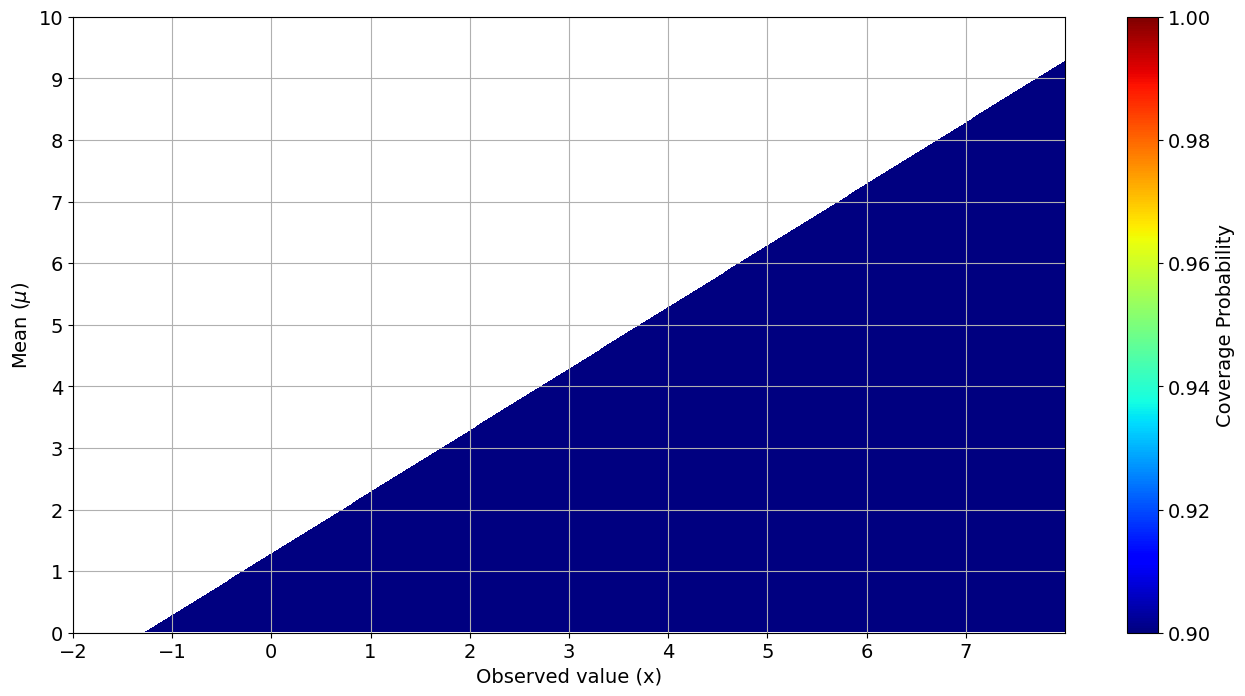

In [16]:
from typing import Tuple
import numpy as np
from scipy.stats import norm
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt
from math import ceil
from matplotlib.cm import jet

def get_central_confidence_interval(
    confidence_level: float, 
    mean: float, 
    std_dev: float
) -> Tuple[float, float, float]:
    """Calculate central confidence interval for normal distribution.
    
    Args:
        confidence_level: Probability within interval (e.g., 0.9 for 90%)
        mean: Mean of normal distribution
        std_dev: Standard deviation of distribution
    
    Returns:
        lower_bound, upper_bound, actual_coverage
    """
    # Calculate symmetric bounds using inverse CDF (quantile function)
    lower_bound = norm.ppf(0.5*(1-confidence_level), mean, std_dev)
    upper_bound = norm.ppf(0.5*(1-confidence_level) + confidence_level, mean, std_dev)
    
    # Calculate actual coverage probability
    actual_coverage = norm.cdf(upper_bound, mean, std_dev) - norm.cdf(lower_bound, mean, std_dev)
    
    return lower_bound, upper_bound, actual_coverage

def get_upper_confidence_limit(
    confidence_level: float, 
    mean: float, 
    std_dev: float
) -> Tuple[float, float]:
    """Calculate upper confidence limit for normal distribution.
    
    Args:
        confidence_level: Desired coverage probability
        mean: Mean of normal distribution
        std_dev: Standard deviation of distribution
    
    Returns:
        limit: Lower bound of interval [limit, ∞)
        actual_coverage: Actual coverage probability
    """
    # Calculate lower bound for upper limit interval
    lower_bound = norm.ppf(1-confidence_level, mean, std_dev)
    
    # Calculate actual coverage probability
    actual_coverage = 1.0 - norm.cdf(lower_bound, mean, std_dev)
    
    return lower_bound, actual_coverage

# Set confidence level and plot parameters
CONFIDENCE_LEVEL = 0.9  # 90% confidence level
N_SAMPLES = 1000       # Number of horizontal slices for visualization
MAX_MEAN = 10.0       # Maximum mean value to plot
X_MIN, X_MAX = -2.0, 8.0  # x-axis limits
STD_DEV = 1.0         # Fixed standard deviation

# Create patches for confidence belt visualization
confidence_patches = []
coverage_probabilities = []

# Calculate confidence limits for different mean values
for i in range(1, N_SAMPLES):
    mean = MAX_MEAN * i / N_SAMPLES
    
    # Get upper confidence limit and its coverage
    lower_bound, coverage = get_upper_confidence_limit(CONFIDENCE_LEVEL, mean, STD_DEV)
    
    # Create rectangle patch for this confidence interval
    patch_height = MAX_MEAN/N_SAMPLES
    confidence_patches.append(Rectangle((lower_bound, mean), X_MAX-lower_bound, patch_height))
    coverage_probabilities.append(coverage)

# Create visualization
confidence_belt = PatchCollection(confidence_patches, alpha=1.0, cmap=jet)
confidence_belt.set_array(np.array(coverage_probabilities))
confidence_belt.set_clim([0.9, 1])  # Set color scale for coverage probability

# Create and configure plot
fig, ax = plt.subplots(figsize=(16,8))
ax.set_xlim(X_MIN, X_MAX)
ax.set_ylim(0, MAX_MEAN)

# Add confidence belt to plot
ax.add_collection(confidence_belt)

# Configure axes and grid
ax.set_yticks([MAX_MEAN*x/10 for x in range(11)])
ax.set_xticks([X_MIN + x for x in range(ceil(X_MAX-X_MIN))])
ax.grid(which='both', axis='x')
ax.grid(which='major', axis='y')
ax.set_xlabel('Observed value (x)')
ax.set_ylabel('Mean ($\mu$)')

plt.colorbar(confidence_belt, label='Coverage Probability')
plt.show()

### 10.2 The issue of flip-flopping

#### 10.2.1 Combining different approaches

As a remedy for not being able to quote intervals for negative measurement results one might decide to combine these approaches, for example according to the following recipe:
- For a measured value above $3\sigma$ we quote a central interval.
- For a less significant value we quote an upper limit.
- For a negative measured value we quote a constant upper limit, the same as for $x_0=0$.

This is illustrated below for 90% intervals.

<>:87: SyntaxWarning: invalid escape sequence '\m'
<>:87: SyntaxWarning: invalid escape sequence '\m'
/var/folders/sq/1nnyt8dx16xcb3rm20k11c9m0000gp/T/ipykernel_80859/2596843941.py:87: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Mean ($\mu$)')


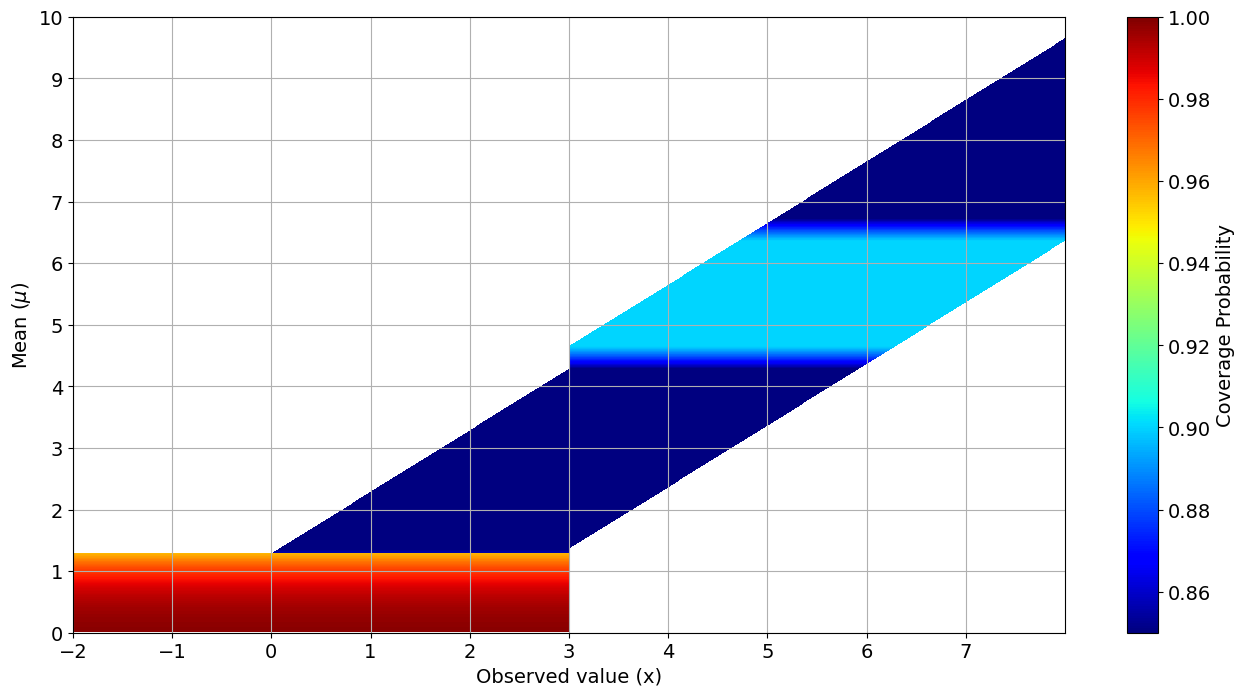

In [17]:
from typing import Tuple
import numpy as np
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt
from scipy.stats import norm
from math import ceil

def get_central_interval(confidence_level: float, mean: float, std_dev: float) -> Tuple[float, float]:
    """Calculate the central confidence interval for a normal distribution.
    
    Returns lower and upper bounds where probability is symmetrically distributed."""
    lower_bound = norm.ppf(0.5*(1-confidence_level), mean, std_dev)
    upper_bound = norm.ppf(0.5*(1-confidence_level) + confidence_level, mean, std_dev)
    return lower_bound, upper_bound

def get_upper_interval(confidence_level: float, mean: float, std_dev: float) -> float:
    """Calculate the upper confidence interval for a normal distribution.
    
    Returns lower bound where upper tail contains (1-confidence_level) probability."""
    lower_bound = norm.ppf(1-confidence_level, mean, std_dev)
    return lower_bound

def calculate_probability(lower_x: float, upper_x: float, mean: float, std_dev: float) -> float:
    """Calculate probability between two points in a normal distribution."""
    return norm.cdf(upper_x, mean, std_dev) - norm.cdf(lower_x, mean, std_dev)

# Define main parameters
CONFIDENCE_LEVEL = 0.9  # 90% confidence level
N_SAMPLES = 1000        # Number of y-axis points
MAX_MEAN = 10.0        # Maximum mean value
X_MIN = -2.0          # Minimum x-axis value
X_MAX = 8.0           # Maximum x-axis value
STD_DEV = 1.0         # Standard deviation
THRESHOLD = 3.0       # Critical value for flip-flopping

# Initialize lists for plotting
confidence_patches = []
coverage_probabilities = []

# Calculate confidence intervals for different mean values
for i in range(1, N_SAMPLES):
    mean = MAX_MEAN * i / N_SAMPLES
    
    # Get bounds for both interval types
    lower_bound_upper = get_upper_interval(CONFIDENCE_LEVEL, mean, STD_DEV)
    lower_bound_central, upper_bound_central = get_central_interval(CONFIDENCE_LEVEL, mean, STD_DEV)
    
    # Implement flip-flopping logic
    # Choose between central and upper limit based on threshold
    if lower_bound_central > THRESHOLD:
        lower_x = lower_bound_central
    elif lower_bound_central <= THRESHOLD and lower_bound_upper > THRESHOLD:
        lower_x = THRESHOLD
    elif lower_bound_upper > 0:
        lower_x = lower_bound_upper
    else:
        lower_x = X_MIN
        
    upper_x = min(upper_bound_central if upper_bound_central > THRESHOLD else THRESHOLD, X_MAX)
    
    # Calculate coverage probability
    prob = (calculate_probability(-99., upper_x, mean, STD_DEV) if lower_x == X_MIN 
            else calculate_probability(lower_x, upper_x, mean, STD_DEV))
    
    # Create rectangle for visualization
    confidence_patches.append(Rectangle((lower_x, mean), upper_x-lower_x, MAX_MEAN/N_SAMPLES))
    coverage_probabilities.append(prob)

# Create visualization
confidence_belt = PatchCollection(confidence_patches, alpha=1.0, cmap='jet')
confidence_belt.set_array(np.array(coverage_probabilities))
confidence_belt.set_clim([0.85, 1])  # Set color scale for probability

# Create plot
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_xlim(X_MIN, X_MAX)
ax.set_ylim(0, MAX_MEAN)
ax.add_collection(confidence_belt)

# Set plot aesthetics
ax.set_yticks([MAX_MEAN * x/10 for x in range(11)])
ax.set_xticks([X_MIN + x for x in range(ceil(X_MAX-X_MIN))])
ax.grid(which='both', axis='x')
ax.grid(which='major', axis='y')
ax.set_xlabel('Observed value (x)')
ax.set_ylabel('Mean ($\mu$)')

plt.colorbar(confidence_belt, label='Coverage Probability')
plt.show()

#### 10.2.2 Flip-flopping

You should have received sufficient warnings about fully defining your procedure prior to performing the measurement that this measurement-dependent recipe should set off some alarm bells.

Let's have a look at the coverage of this approach.

For $\mu=2$ the coverage is too low as the right-hand limit is defined by the central interval belt, which appears to be shifted up compared to the upper limit belt. Therefore, the intervals undercover, which is problematic.

Also, considering $\mu=1$, it is apparent that the intervals overcover. More generally, for $\mu$ between $0$ and about $1.2$ the coverage obviously varies as the interval stays constant while $P(x|\mu)$ changes.


#### 10.2.3 Poisson belts

In the case of a counting experiment we have to use Poisson intervals, which have the particularity of leading to stair-like plots as they refer to a discrete distribution, i.e. we can only observe whole events.

In such experiments we are often interested in identifying a particular signal in the presence of background events.

The Poisson distribution function in the presence of a known amount of background, $b$, is

$$P(n|\mu,b)=e^{-(\mu+b)}\frac{(\mu+b)^n}{n!}.$$

As discussed before, when defining confidence intervals we rather overcover as we are in general unable to hit the desired confidence level exactly.

The following plots show the resulting confidence belts for central intervals and upper limits. They assume $b=3$.

<>:74: SyntaxWarning: invalid escape sequence '\l'
<>:74: SyntaxWarning: invalid escape sequence '\l'
/var/folders/sq/1nnyt8dx16xcb3rm20k11c9m0000gp/T/ipykernel_80859/1953751221.py:74: SyntaxWarning: invalid escape sequence '\l'
  ax.set_ylabel('Signal strength ($\lambda_s$)')


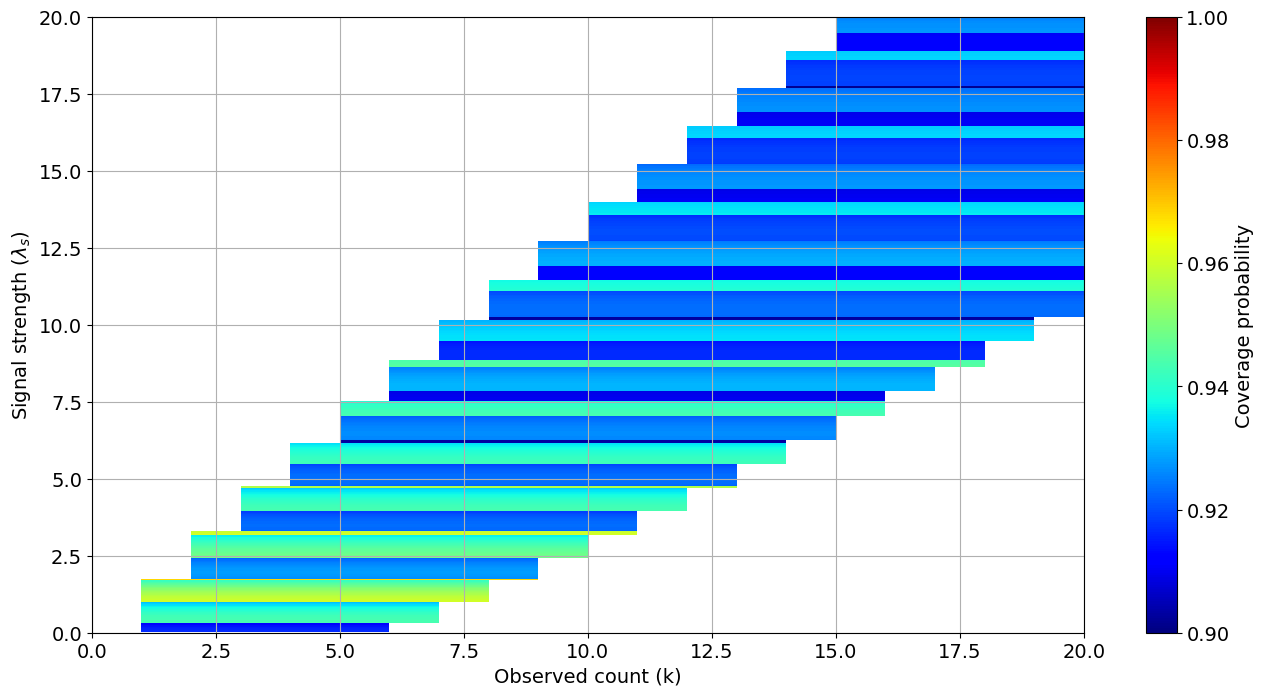

In [18]:
from typing import Tuple
import numpy as np
from scipy.stats import poisson
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt
from matplotlib.cm import jet

def calculate_poisson_interval(
    confidence_level: float, 
    lambda_val: float
) -> Tuple[float, float, float]:
    """
    Calculate the central confidence interval for a Poisson distribution.
    
    Args:
        confidence_level: Desired confidence level (e.g., 0.9 for 90%)
        lambda_val: Mean of the Poisson distribution
    
    Returns:
        Tuple of (lower bound, upper bound, actual coverage probability)
    """
    # Calculate lower and upper bounds using quantiles
    lower_bound = poisson.ppf(0.5*(1-confidence_level), lambda_val)
    upper_bound = poisson.ppf(0.5*(1-confidence_level) + confidence_level, lambda_val)
    
    # Calculate actual coverage probability, accounting for discrete nature
    if lower_bound > 0:
        coverage = poisson.cdf(upper_bound, lambda_val) - poisson.cdf(lower_bound-1, lambda_val)
    else:
        coverage = poisson.cdf(upper_bound, lambda_val)
        
    return lower_bound, upper_bound, coverage

# Set main parameters
CONFIDENCE_LEVEL = 0.9  # 90% confidence level
N_SAMPLES = 1000        # Number of y-axis points (resolution)
MAX_LAMBDA = 20.0       # Maximum mean value to plot
MAX_X = 20             # Maximum observed count to plot
BACKGROUND = 3         # Background count rate

# Create lists to store the confidence belt visualization data
belt_patches = []
coverage_probabilities = []

# Calculate confidence intervals for different mean values
for i in range(1, N_SAMPLES):
    # Calculate true mean (signal + background)
    mean = MAX_LAMBDA * i / N_SAMPLES + BACKGROUND
    
    # Get confidence interval bounds and coverage
    lower, upper, prob = calculate_poisson_interval(CONFIDENCE_LEVEL, mean)
    
    # Create rectangle for visualization
    height = MAX_LAMBDA/N_SAMPLES
    belt_patches.append(Rectangle((lower, mean-BACKGROUND), upper-lower, height))
    coverage_probabilities.append(prob)

# Create visualization
fig, ax = plt.subplots(figsize=(16, 8))

# Create and configure the confidence belt collection
belt_collection = PatchCollection(belt_patches, alpha=1.0, cmap=jet)
belt_collection.set_array(np.array(coverage_probabilities))
belt_collection.set_clim([0.9, 1])  # Color range for coverage probability

# Add the confidence belt to the plot
ax.add_collection(belt_collection)

# Configure axes
ax.set_xlim(0, MAX_X)
ax.set_ylim(0, MAX_LAMBDA)
ax.set_xlabel('Observed count (k)')
ax.set_ylabel('Signal strength ($\lambda_s$)')

# Add grid
ax.grid(which='both', axis='x')
ax.grid(which='major', axis='y')

# Add colorbar showing coverage probability
plt.colorbar(belt_collection, label='Coverage probability')

plt.show()


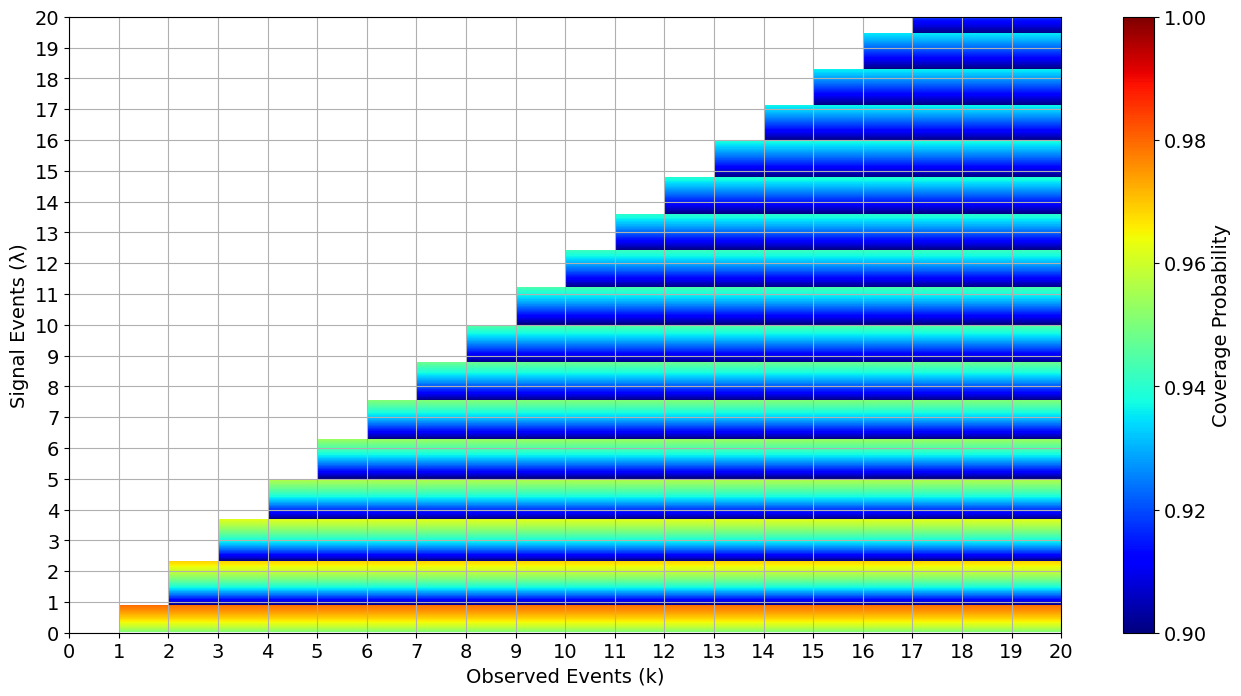

In [20]:
from typing import Tuple
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from scipy.stats import poisson
from matplotlib.cm import jet

def calculate_poisson_upper_interval(confidence_level: float, mean: float) -> Tuple[float, float]:
    """
    Calculate the upper interval for a Poisson distribution.
    
    Args:
        confidence_level: The desired confidence level (e.g., 0.9 for 90%)
        mean: The mean (λ) of the Poisson distribution
    
    Returns:
        Tuple of (upper_limit, probability)
    """
    # Find the largest k where cumulative probability is less than (1-confidence_level)
    k_max = poisson.ppf(1-confidence_level, mean)
    
    if k_max > 0:
        # Calculate actual coverage probability for this k
        probability = 1.0 - poisson.cdf(k_max-1, mean)
        return k_max, probability
    return k_max, 1.0

# Statistical parameters
confidence_level = 0.9  # 90% confidence level
background_count = 3    # Expected background events
max_mean_signal = 20.   # Maximum mean signal events to consider
max_observed = 20       # Maximum observed events to plot

# Plotting parameters
n_samples = 1000        # Number of points to sample (higher = smoother plot)
poisson_patches = []    # Store rectangles for confidence belt
coverage_probabilities = []  # Store actual coverage probabilities

# Generate points for the confidence belt
for i in range(1, n_samples):
    # Calculate mean signal + background for this point
    current_mean = max_mean_signal * i / n_samples + background_count
    
    # Calculate upper limit and its actual coverage probability
    upper_limit, prob = calculate_poisson_upper_interval(confidence_level, current_mean)
    
    # Create rectangle for this segment of the belt
    width = max_observed - upper_limit
    height = max_mean_signal / n_samples
    rect = Rectangle((upper_limit, current_mean - background_count), width, height)
    
    poisson_patches.append(rect)
    coverage_probabilities.append(prob)

# Create the confidence belt collection
belt = PatchCollection(poisson_patches, alpha=1.0, cmap=jet)
belt.set_array(np.array(coverage_probabilities))
belt.set_clim([confidence_level, 1])

# Create and setup the plot
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_xlim(0, max_observed)
ax.set_ylim(0, max_mean_signal)

# Add the confidence belt to the plot
ax.add_collection(belt)

# Setup axes and grid
ax.set_yticks([max_mean_signal * x/20 for x in range(21)])
ax.set_xticks(range(max_observed + 1))
ax.grid(which='both', axis='x')
ax.grid(which='major', axis='y')
ax.set_xlabel('Observed Events (k)')
ax.set_ylabel('Signal Events (λ)')

# Add colorbar showing coverage probability
plt.colorbar(belt, label='Coverage Probability')
plt.show()

### 10.3 The Feldman-Cousins method

#### 10.3.1 Description of the method and application to Poisson intervals

The issue of flip-flopping is caused by the mixture of vertical and horizontal construction of the confidence intervals. It is therefore desirable to have an approach that solely depends on a horizontal construction.

A purely horizontal construction cannot a priori define whether it results in an interval or an upper limit as this is, in the end, a result of a vertical cut through the confidence belt at the measured value.

Feldman and Cousins proposed the following alternative approach. The method may appear a little contrived, but this is simply due to the fact that it is strictly restricted to a horizontal construction that does not pre-define whether a central interval or an upper limit is being constructed. 

The following example is based on a counting experiment (therefore involving Poisson distributions) with the presence of background.
This means that the total count $k$ will include a certain number $b$ of background events, where $b$ is assumed to be known.

It proceeds as follows:
- Consider the construction of a confidence interval of level $C$ for a given $\mu$.
- For each value of $k$ there is a value of $\mu$ that maximises $P(k|\mu)$ and this value shall be called $\mu_{\rm best}$.
- In our case this is simply $\mu_{\rm best}={\rm max}(0,k-b)$.
- Define the ratio $R=P(k|\mu)/P(k|\mu_{\rm best})$. Given that $\mu_{\rm best}$ maximises the probability distribution function, this ratio is between $0$ and $1$.
- Order all possible values of $k$ by their corresponding values of $R$ and, starting from the largest $R$, add the values of $k$ to the confidence interval until the sum of their probabilities exceeds $C$.

The relevant values for an example with $b=3$ and $\mu=0.5$ are given in the table below.
The probabilities of rank 1-7 add up to (compare the column 'CumulativeSum')

$$0.189+0.216+0.185+0.132+0.106+0.030+0.077 = 0.935,$$

which covers a 90% interval.

This construction leads to an automatic transition between one-sided and two-sided intervals and thereby gives a pre-defined transition from quoting a two-sided interval to an upper limit. Note that nowhere in this procedure does the observed number of events enter.

There are two caveats around the Feldman-Cousins method:
- In the case of having observed 0 events, a measurement with greater levels of expected background can lead to a lower upper limit compared to a measurement with fewer expected background events.
- The approach does not readily allow the inclusion of so-called nuisance parameters, which are used to account for systematic uncertainties. However, alternatives exist that mitigate this issue, but that's outside the scope of this course.

Below is the corresponding table of numbers to follow the method for $\mu=0.5$ and the complete confidence belt.

Calculating P(n|μ_best)
Calculating Feldman-Cousins intervals


100%|██████████| 399/399 [00:04<00:00, 89.80it/s] 


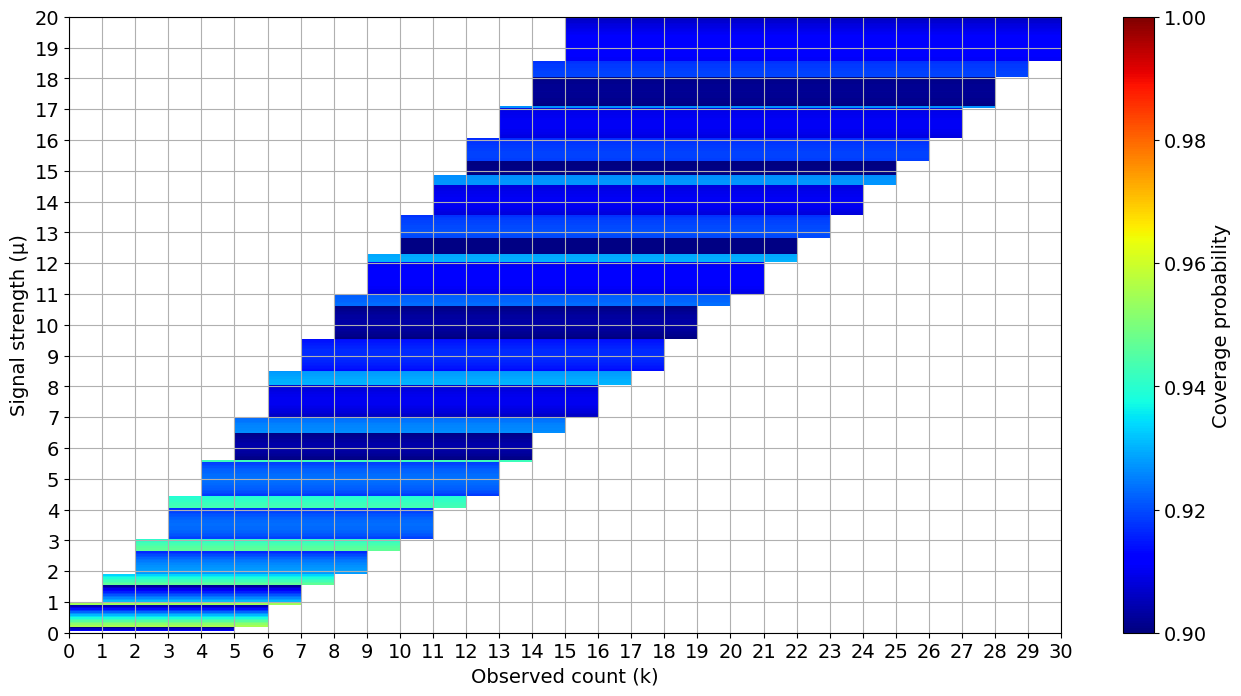

In [19]:
from typing import List, Tuple
import numpy as np
import pandas as pd
from scipy.stats import poisson
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt
from tqdm import trange
from matplotlib.cm import jet

def calculate_interval_probability(k_min: int, k_max: int, lambda_val: float) -> float:
    """
    Calculate the probability within a Poisson interval [k_min, k_max] for mean lambda_val
    Args:
        k_min: Lower bound of interval
        k_max: Upper bound of interval
        lambda_val: Mean of Poisson distribution
    """
    if k_min > 0:
        return poisson.cdf(k_max, lambda_val) - poisson.cdf(k_min-1, lambda_val)
    return poisson.cdf(k_max, lambda_val)

# Configuration parameters
CONFIDENCE_LEVEL = 0.9  # Desired confidence level (90%)
N_SAMPLES = 400        # Number of λ values to sample
MAX_MEAN = 20.0       # Maximum mean value to consider
MAX_COUNT = 30        # Maximum observed count
BACKGROUND = 3.0      # Expected background count

# Initialize containers for plotting
confidence_belt_patches = []
coverage_probabilities = []

# Calculate P(n|μ_best) for all possible observed counts
print('Calculating P(n|μ_best)')
p_best_fits = []
for observed_count in range(MAX_COUNT + 1):
    # Best-fit signal = max(0, observed - background)
    mu_best = max(0, observed_count - BACKGROUND)
    p_best_fits.append(poisson.pmf(observed_count, mu_best + BACKGROUND))

print('Calculating Feldman-Cousins intervals')
for i in trange(1, N_SAMPLES):
    # Current signal hypothesis
    signal = MAX_MEAN * i / N_SAMPLES
    total_mean = signal + BACKGROUND
    
    # Create table for Feldman-Cousins ordering principle
    fc_data = []
    for k in range(MAX_COUNT + 1):
        mu_best = max(0, k - BACKGROUND)
        p_observed = poisson.pmf(k, total_mean)     # P(k|μ)
        p_best = p_best_fits[k]                     # P(k|μ_best)
        
        if p_best > 0:  # Avoid division by zero
            fc_data.append({
                'k': k,
                'P(k|mu)': p_observed,
                'mu_best': mu_best,
                'P(k|mu_best)': p_best
            })
    
    # Create and sort DataFrame by likelihood ratio
    fc_table = pd.DataFrame(fc_data)
    fc_table['R'] = fc_table['P(k|mu)'] / fc_table['P(k|mu_best)']
    fc_table = fc_table.sort_values('R', ascending=False)
    fc_table['CumulativeSum'] = fc_table['P(k|mu)'].cumsum()
    
    # Find interval bounds
    accepted_counts = fc_table.query('CumulativeSum < @CONFIDENCE_LEVEL')['k'].values
    accepted_counts = np.hstack([
        accepted_counts, 
        fc_table.query('CumulativeSum >= @CONFIDENCE_LEVEL').head(1)['k'].values
    ])
    
    k_min = accepted_counts.min()
    k_max = min(accepted_counts.max(), MAX_COUNT)
    
    # Calculate actual coverage probability
    coverage_prob = calculate_interval_probability(k_min, k_max, total_mean)
    
    # Store visualization data
    confidence_belt_patches.append(
        Rectangle((k_min, signal), k_max-k_min, MAX_MEAN/N_SAMPLES)
    )
    coverage_probabilities.append(coverage_prob)

# Visualization
confidence_belt = PatchCollection(confidence_belt_patches, alpha=1.0, cmap=jet)
confidence_belt.set_array(np.array(coverage_probabilities))
confidence_belt.set_clim([0.9, 1])

fig, ax = plt.subplots(figsize=(16, 8))
ax.set_xlim(0, MAX_COUNT)
ax.set_ylim(0, MAX_MEAN)
ax.add_collection(confidence_belt)

# Plot formatting
ax.set_yticks([MAX_MEAN * x/20. for x in range(21)])
ax.set_xticks([x for x in range(MAX_COUNT + 1)])
ax.grid(which='both', axis='x')
ax.grid(which='major', axis='y')
ax.set_xlabel('Observed count (k)')
ax.set_ylabel('Signal strength (μ)')

plt.colorbar(confidence_belt, label='Coverage probability')
plt.show()

#### 10.3.2 Application to Gaussian confidence belts

For a Gaussian (i.e. continuous) variable the procedure is very similar. In short, it is:

- For a Gaussian distributed variable $\mu$ with boundary condition $\mu\ge0$, find the value of $\mu$ for which $P(x|\mu)$ is maximal and call this $\mu_{\rm best}$. This is given by $\mu_{\rm best}={\rm max}(0,x)$.

- Define the likelihood ratio

$$R(x)=\frac{P(x|\mu)}{P(x|\mu_{\rm best})}.$$

- For a given $\mu$ find the interval $[x_1,x_2]$ such that $R(x_1)=R(x_2)$ and $\int_{x_1}^{x_2}P(x|\mu)dx=C$, with $C$ the desired confidence level. This integral gives the accepted range for each value of $\mu$.

The condition $R(x_1)=R(x_2)$ replaces the explicit ordering and, provided that $R(x)$ is continuously falling on either side of $x=\mu_{\rm best}$, it uniquely defines the interval $[x_1,x_2]$ for a given $C$.

At $x=1.28$ the distribution transitions from a one-sided to a two-sided interval.

The full confidence belt is shown in the following plot.

##### Computation requirements

The continuous case requires calculating and sorting many values in $x$ for each value in $\mu$. The exact number is defined by the desired resolution of the plot. 

The plot below already takes several minutes to compute while it is based on a simple Gaussian function. However, here we knew the correct values for $\mu_{\rm best}$ a priori.

If $\mu_{\rm best}$ needs to be calculated, this can add considerable computation requirements.

In reality, this method is likely to be applied to much more complex probability densitiy functions, which take significantly longer to evaluate. Therefore, it can be computationally challenging to obtain a result with the Feldman-Cousins method.

<>:103: SyntaxWarning: invalid escape sequence '\m'
<>:103: SyntaxWarning: invalid escape sequence '\m'
/var/folders/sq/1nnyt8dx16xcb3rm20k11c9m0000gp/T/ipykernel_80859/764160756.py:103: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Mean ($\mu$)')


Calculating P(x|μ_best)
Calculating intervals


100%|██████████| 399/399 [00:35<00:00, 11.24it/s]


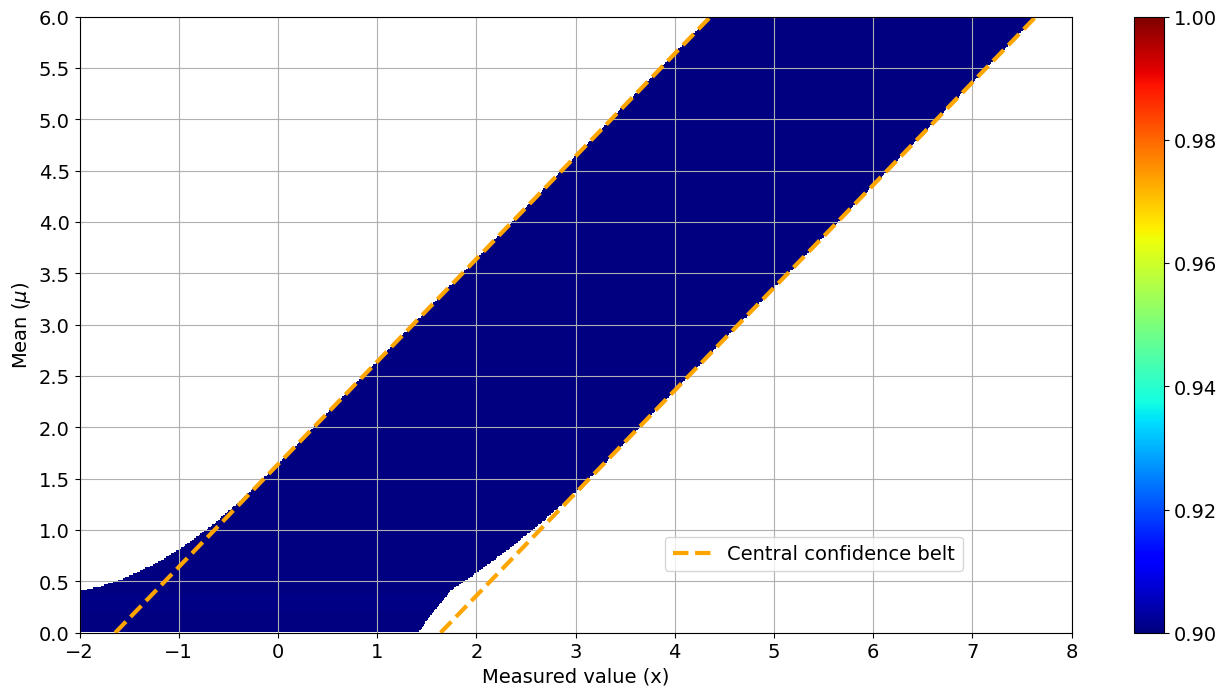

In [21]:
from typing import Tuple, List
from scipy.stats import norm
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import ceil
from tqdm import trange
from matplotlib.cm import jet

def calculate_probability(x_min: float, x_max: float, mean: float, sigma: float) -> float:
    """Calculate probability within interval using normal CDF difference."""
    return norm.cdf(x_max, mean, sigma) - norm.cdf(x_min, mean, sigma)

# Configuration parameters
CONFIDENCE_LEVEL = 0.9  # 90% confidence level
N_SAMPLES_X = 800      # Number of x-axis points
N_SAMPLES_Y = 400      # Number of y-axis (mean) points
MAX_MEAN = 6.0        # Maximum mean value
X_MIN = -2.0         # Minimum x value
X_MAX = 8.0          # Maximum x value
SIGMA = 1.0          # Standard deviation
BIN_WIDTH = (X_MAX - X_MIN) / N_SAMPLES_X

# Lists to store the confidence belt visualization data
confidence_belt_patches: List[Rectangle] = []
confidence_belt_colors: List[float] = []

# Calculate P(x|μ_best) for all x values
print('Calculating P(x|μ_best)')
prob_best_mean = []
for i in range(N_SAMPLES_X):
    x = X_MIN + i / N_SAMPLES_X * (X_MAX - X_MIN)
    # For physical parameters, μ_best cannot be negative
    best_mean = max(0, x)
    prob_best_mean.append(norm.pdf(x, best_mean, SIGMA))

# Calculate Feldman-Cousins intervals for each mean value
print('Calculating intervals')
for i in trange(1, N_SAMPLES_Y):
    mean = MAX_MEAN * i / N_SAMPLES_Y
    
    # Create table for ordering principle
    fc_data = []
    for j in range(N_SAMPLES_X):
        x = X_MIN + j / N_SAMPLES_X * (X_MAX - X_MIN)
        best_mean = max(0, x)
        prob_at_mean = norm.pdf(x, mean, SIGMA)
        prob_at_best = prob_best_mean[j]
        
        if prob_at_best > 0:
            fc_data.append({
                'x': x,
                'P(x|μ)': prob_at_mean,
                'μ_best': best_mean,
                'P(x|μ_best)': prob_at_best
            })
    
    # Create and process Feldman-Cousins table
    fc_table = pd.DataFrame(fc_data)
    # Calculate likelihood ratio R = P(x|μ)/P(x|μ_best)
    fc_table['R'] = fc_table['P(x|μ)'] / fc_table['P(x|μ_best)']
    # Sort by likelihood ratio (descending)
    fc_table = fc_table.sort_values('R', ascending=False)
    # Calculate cumulative probability
    fc_table['CumulativeSum'] = fc_table['P(x|μ)'].cumsum() * BIN_WIDTH
    
    # Find interval boundaries for confidence level
    accepted_x = fc_table.query('CumulativeSum < @CONFIDENCE_LEVEL')['x'].values
    boundary_x = fc_table.query('CumulativeSum >= @CONFIDENCE_LEVEL').head(1)['x'].values
    accepted_x = np.hstack([accepted_x, boundary_x])
    
    # Calculate interval boundaries and probability content
    x_min = max(accepted_x.min(), X_MIN)
    x_max = min(accepted_x.max(), X_MAX)
    interval_prob = calculate_probability(x_min, x_max, mean, SIGMA)
    
    # Store visualization data
    belt_height = MAX_MEAN/N_SAMPLES_Y
    confidence_belt_patches.append(
        Rectangle((x_min, mean-belt_height/2), x_max-x_min, belt_height)
    )
    confidence_belt_colors.append(interval_prob)

# Create visualization
confidence_belt = PatchCollection(confidence_belt_patches, alpha=1.0, cmap=jet)
confidence_belt.set_array(np.array(confidence_belt_colors))
confidence_belt.set_clim([0.9, 1])

# Plot configuration
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_xlim(0, X_MAX)
ax.set_ylim(0, MAX_MEAN)
ax.add_collection(confidence_belt)

# Add grid and labels
ax.set_yticks([MAX_MEAN*x/12 for x in range(13)])
ax.set_xticks([X_MIN + x for x in range(ceil(X_MAX-X_MIN)+1)])
ax.grid(which='both', axis='x')
ax.grid(which='major', axis='y')
ax.set_xlabel('Measured value (x)')
ax.set_ylabel('Mean ($\mu$)')

# Add central confidence belt boundaries
ax.plot([-1.64, MAX_MEAN-1.64], [0, MAX_MEAN], 
        color='orange', linewidth=3, linestyle='--', 
        label='Central confidence belt')
ax.plot([1.64, MAX_MEAN+1.64], [0, MAX_MEAN], 
        color='orange', linewidth=3, linestyle='--')
ax.legend(loc=[0.59, 0.10])

plt.colorbar(confidence_belt)
plt.show()

<div class="well" align="center">
    <div class="container-fluid">
        <div class="row">
            <div class="col-md-3" align="center">
                <img align="center" alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" width="60%">
            </div>
            <div class="col-md-8">
            This work is licensed under a <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>).
            </div>
        </div>
    </div>
    <br>
    <br>
    <i>Note: The content of this Jupyter Notebook is provided for educational purposes only.</i>
</div>